## Exercise 4, clustering and data visualization

1) Read data files as “data_t-SNE_310101_d5_R100_e1_N800.dat” provided in the google 
    folder, which contain high dimensional data (d=5 in this case, with columns separated by the
    tab “\t”) with embedded manifolds as those in the figure, which represent three clusters with 
    a linear closed structure. Given N data points, the first 10% belongs to cluster “0” (red), the 
    next 30% to cluster “1” (green) and the last 60% to cluster “2” (blue). The green cluster is 
    linked to the blue one, in the 3d representation. This is expected to challenge the 
    convergence of t-SNE. The knotted structure of the blue cluster should introduce a similar 
    challenge to t-SNE, which tries to
    unfold the data in two dimensions.
    
2) Apply t-SNE with 4 different perplexities to the data. The method is one out of many 
    methods available at scikit website:
    https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
    
3) From NB15 extract the part concerning the DBSCAN algorithm for clustering and embed it 
    in the notebook to analyze the clustering in d=5 dimensions to generate predicted labels, 
    then plot the results. Something like the next figure should arise. It includes a grid with 
    several values of “eps” and “minPts”
    The figure specifies, for each panel, the corresponding value of “nmi” defined in the 
    notebook by Mehta et al, which quantifies the difference between true labels and predicted 
    ones.
    One needs to take care of introducing meaningful values of “eps” in DBSCAN: this 
    parameter is the radius of the spheres around points, and one needs spheres to be reasonably 
    full. In your notebook, find the typical scale separating points in d=5 from their first 
    neighbors, and use it as a reference for “eps”, trying some multiples of that value.
    
4) As usual, play with parameters. For instance, in t-SNE one may initialize the algorithm by 
    using principal component analysis (PCA). Also a 3D version of t-SNE could be used; it is 
    available in the packages.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets
import scipy as sp

In [136]:
file = 'DATA/data_t-SNE_310101_d5_R100_e1_N800.dat'
data = np.loadtxt(file, delimiter='\t', dtype=int)

tsne = manifold.TSNE(n_components=3)
X_embedded = tsne.fit_transform(data)
n = data.shape[0]
n_components = 3


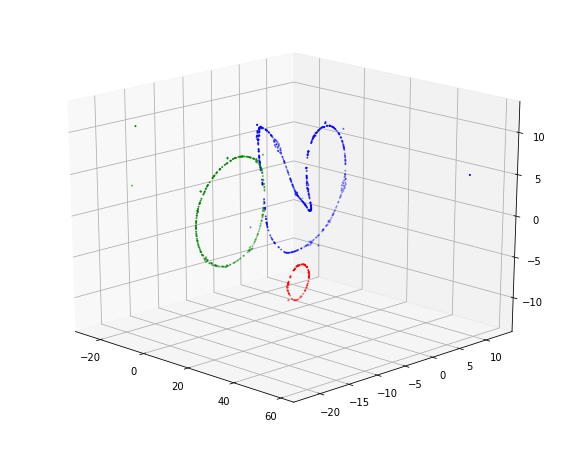

In [123]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,  projection='3d')
#ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2], c="r")
ax.scatter(X_embedded[:n//10,0],X_embedded[:n//10,1],X_embedded[:n//10,2], s=1, c="r")
ax.scatter(X_embedded[n//10:int(n*0.4),0],X_embedded[n//10:int(n*0.4),1],X_embedded[n//10:int(n*0.4),2], s=1,c="g")
ax.scatter(X_embedded[int(n*0.4):,0],X_embedded[int(n*0.4):,1],X_embedded[int(n*0.4):,2], s=1, c="b")
ax.view_init(20, -45)
plt.axis('tight');
plt.show()

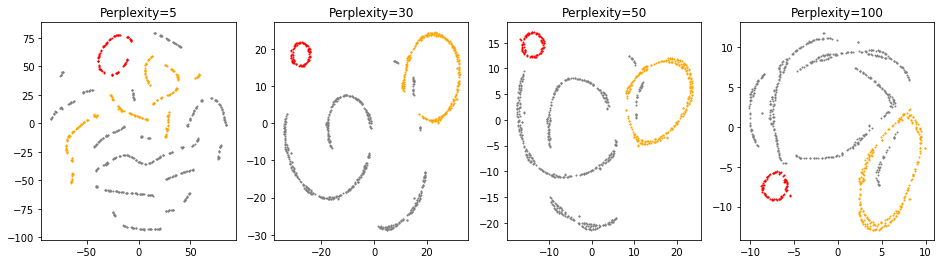

In [140]:
perplexities = [5, 30, 50, 100]


(fig, subplots) = plt.subplots(1, 4, figsize=(16, 4))

for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    tsne = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=perplexity)
    X_embedded = tsne.fit_transform(data)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(X_embedded[:n//10,0], X_embedded[:n//10,1], s=1, c='r')
    ax.scatter(X_embedded[n//10:int(n*0.4),0], X_embedded[n//10:int(n*0.4),1], s=1, c="orange")
    ax.scatter(X_embedded[int(n*0.4):,0], X_embedded[int(n*0.4):,1], s=1, c="gray")
    ax.axis('tight')
plt.show()